In [5]:
pwd

u'/home/optiplex/na542/workspace/maptorqds/code'

In [6]:
import plotly
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
plotly.tools.set_credentials_file(username='na542@msstate.edu', api_key='fC8lnTDCUQ5G3zDxrqeW')



In [7]:
dfmscounty = pd.read_csv('./results/dls_stats/mscounty.csv',delimiter=',')
dfuscounty = pd.read_csv('./results/dls_stats/uscounty.csv',delimiter=',')
dfuscong = pd.read_csv('./results/dls_stats/cong.csv',delimiter=',')
dfusstate = pd.read_csv('./results/dls_stats/usstate.csv',delimiter=',')

dfmscounty.columns = ['data','pid','inputlines','splits','cgrayrec','cgreenrec','cwhiterec','dlsbytes']
dfuscounty.columns = ['data','pid','inputlines','splits','cgrayrec','cgreenrec','cwhiterec','dlsbytes']
dfusstate.columns = ['data','pid','inputlines','splits','cgrayrec','cgreenrec','cwhiterec','dlsbytes']
dfuscong.columns = ['data','pid','inputlines','splits','cgrayrec','cgreenrec','cwhiterec','dlsbytes']

frames= [dfmscounty,dfuscounty,dfusstate,dfuscong]
combDf = pd.concat(frames)
combDf.shape
combDf.head(4)

,data,pid,inputlines,splits,cgrayrec,cgreenrec,cwhiterec,dlsbytes
0,mscounty,Alcorn,351,752,0,628,617,6280
1,mscounty,Tippah,378,848,1,670,669,6280
2,mscounty,Benton,348,809,0,669,659,6280
3,mscounty,Desoto,2270,7003,0,5360,5601,98440


In [122]:
import pandas as pd
import random
#df = pd.read_csv('./results/dls_stats/raw_data_all_cat.csv',delimiter=',')

dfselected = combDf[combDf['cgrayrec'] > 1]
print("selected all the rows with gray> 5"), dfselected.shape

mscountyDf =dfselected[dfselected['data'] == 'mscounty']
uscountyDf =dfselected[dfselected['data'] == 'uscounty']
uscongDf =dfselected[dfselected['data'] == 'cong']
usstateDf =dfselected[dfselected['data'] == 'usstate']

print("Selected data from each category")
print mscountyDf.shape, uscountyDf.shape, uscongDf.shape, usstateDf.shape
#randomly select data.(5, 8) (362, 8) (293, 8) (21, 8)

rl = random.sample(xrange(len(mscountyDf)), int(len(mscountyDf) * 40/100))
rl1 = random.sample(xrange(len(uscountyDf)), int(len(uscountyDf) * 5/100))
rl2 = random.sample(xrange(len(uscongDf)), int(len(uscongDf) * 5/100))
rl3 = random.sample(xrange(len(usstateDf)), int(len(usstateDf) * 5/100))

pmscDf = mscountyDf.iloc[rl,:]
puscDf = uscountyDf.iloc[rl1,:]
puscongcDf = uscongDf.iloc[rl2,:]
pusstateDf = usstateDf.iloc[rl3,:]

combPlotDf = pd.concat([pmscDf,puscDf, puscongcDf, pusstateDf])
print combPlotDf.shape


selected all the rows with gray> 5 (681, 8)
Selected data from each category
(5, 8) (362, 8) (293, 8) (21, 8)
(35, 8)


In [112]:
combDf.groupby(combDf['data'],).describe().head(3)

cgrayrec    cgreenrec    cwhiterec      dlsbytes   inputlines  \
data                                                                          
cong count  352.000000   352.000000   352.000000    352.000000   352.000000   
     mean     5.230114  5122.093750  5084.403409  44034.181818  1136.261364   
     std      4.395141  5672.436086  5673.814271  35255.889921   840.716914   

                 splits  
data                     
cong count   352.000000  
     mean   6293.789773  
     std    6968.485774

In [135]:

plotDf = combPlotDf.iloc[1:,1:] #remove data column and 'none' column
plotDf.head(10)
plotDf.rename(columns={'pid': 'data'},inplace=True)
plotDf.to_csv('./results/represents.csv',index=False)
plotDf.head(12)

,data,inputlines,splits,cgrayrec,cgreenrec,cwhiterec,dlsbytes
1043,Adams,958,1943,2,1549,1620,49432
2406,Utah,1751,6538,3,5224,5386,196888
1877,Hamilton,3001,7488,2,6241,6095,196888
1085,Mills,2229,7437,2,6103,6385,196888
2696,Adams,1588,3969,2,2567,3488,196888
655,Benson,2049,4954,2,4430,4503,196888
2159,Harrison,13671,70091,4,53407,58107,786712
1674,Smyth,11598,33485,3,26066,27297,786712
1429,Hayes,2083,8396,4,6073,6868,196888
1928,Cattaraugus,6484,31303,3,23333,23590,196888


['None', 'Lee', 'Waynesboro', 'Pierce', 'Dane', 'Lamar', 'Benton', 'Lafayette', 'Jefferson', 'Carteret', 'Bastrop', 'Wayne', 'Denali', 'Nicollet', 'Harrison', 'Adams', 'Jefferson', 'Greene', 'Walsh', 'Manistee', 'CD-GEOID-0604', 'CD-GEOID-1215', 'CD-GEOID-5108', 'CD-GEOID-1804', 'CD-GEOID-0902', 'CD-GEOID-4829', 'CD-GEOID-0402', 'CD-GEOID-0101', 'CD-GEOID-2103', 'CD-GEOID-3204', 'CD-GEOID-3703', 'CD-GEOID-2002', 'CD-GEOID-2908', 'CD-GEOID-1601', 'Minnesota']


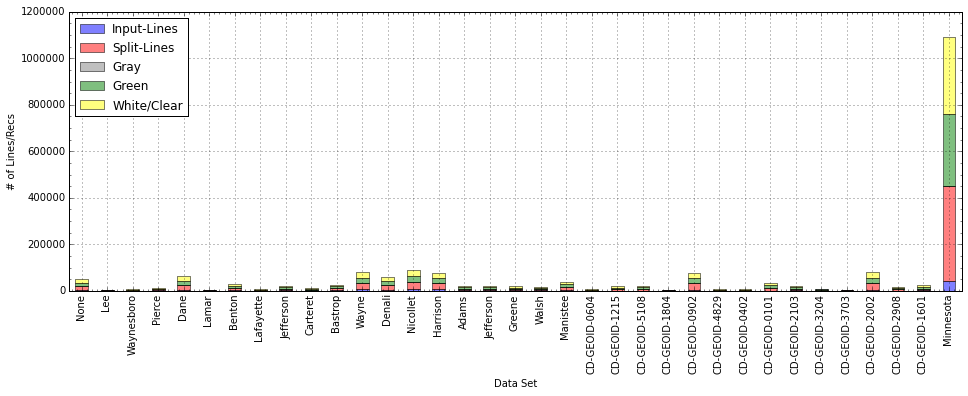

In [13]:
category_names = list(combPlotDf['pid'])
print category_names
# Create the |general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(16,5))

# Set the bar width
bar_width = 0.5

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(combPlotDf['inputlines']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        combPlotDf['inputlines'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Input-Lines',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='blue')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        combPlotDf['splits'],
        width=bar_width,
        bottom=combPlotDf['inputlines'],
        label='Split-Lines',
        alpha=0.5,
        color='red')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        combPlotDf['cgrayrec'],
        width=bar_width,
        bottom=[i+j for i,j in zip(combPlotDf['inputlines'],combPlotDf['splits'])],
        label='Gray',
        alpha=0.5,
        color='gray')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        combPlotDf['cgreenrec'],
        width=bar_width,
        bottom= [i+j+k for i,j,k in zip(combPlotDf['inputlines'],combPlotDf['splits'],combPlotDf['cgrayrec'])] ,
        label='Green',
        alpha=0.5,
        color='green')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        combPlotDf['cwhiterec'],
        width=bar_width,
        bottom=[i+j+k+l for i,j,k,l in zip(combPlotDf['inputlines'],combPlotDf['splits'],combPlotDf['cgrayrec'],combPlotDf['cgreenrec'])],
        label='White/Clear',
        alpha=0.5,
        color='yellow')

# set the x ticks with names
plt.xticks(tick_pos, category_names,rotation='vertical') #df3T.index)

# Set the label and legends
ax1.set_ylabel("# of Lines/Recs")
ax1.set_xlabel("Data Set")
plt.legend(loc='upper left')
# Set a buffer around the edge
plt.minorticks_on()
ax1 = plt.gca()
ax1.grid(True)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

plt.savefig('./results/dls_stats/multi_poly.png', bbox_inches='tight')


In [93]:
#Plotting means

df = combDf

#find out means for each of the columns
ms = list(df[df["data"] == 'mscounty'].iloc[0:,2:].mean(axis=0)) #ignore first 2
usst = list(df[df["data"] == 'uscounty'].iloc[0:,2:].mean(axis=0))
uscong = list(df[df["data"] == 'usstate'].iloc[0:,2:].mean(axis=0))
uscounty = list(df[df["data"] == 'cong'].iloc[0:,2:].mean(axis=0))

raw_data = {'stat': ['inputlines', 'splits','cgrayrec','cgreenrec','cwhiterec','dlsbytes'],
          #'MS-Counties', 'US-Counties', 'US-State', 'US-Congress'
        'msc':ms[0:],
        'usc':usst[0:],
        'uss': usst[0:],
        'uscong': uscong[0:]}

df3 = pd.DataFrame(raw_data, columns = ['stat','msc', 'usc', 'uss', 'uscong'])
print df3.index
df3T   = df3.T
df3T.index = ['data']+list(df3T.index)[1:]
df3T.index
df3T



RangeIndex(start=0, stop=6, step=1)


,0,1,2,3,4,5
data,inputlines,splits,cgrayrec,cgreenrec,cwhiterec,dlsbytes
msc,1441.8,5584.35,0.440476,4374.27,4504.8,51701.7
usc,2382.11,8038.29,0.55552,6348.04,6578.39,150577
uss,2382.11,8038.29,0.55552,6348.04,6578.39,150577
uscong,18223.5,85509,2.16279,67384,70514.8,611107


In [100]:
#dfN = df3T.iloc[1:,:].convert_objects(convert_numeric=True)
df3T.index = ['data','MS-State County','US County','US State','US Cong. Dist']
df3T.index             

Index([u'data', u'MS-State County', u'US County', u'US State',
       u'US Cong. Dist'],
      dtype='object')

In [101]:
df3T.to_csv("./results/avg_summary.csv",header=None, float_format='%.3f',index=True)



KeyError: 'inputlines'

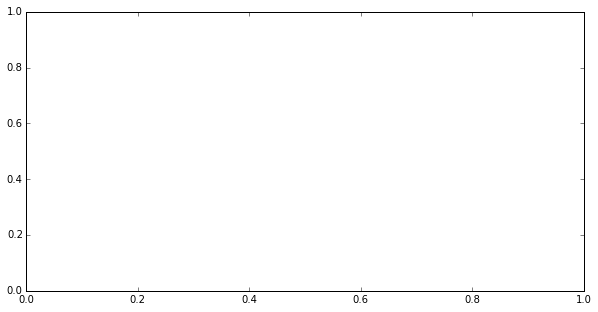

In [71]:
category_names = ['MS County', 'US County','US State', 'US Cong. D']

category_names = category_names
# Create the |general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.5

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df3T['inputlines']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        df3T['inputlines'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Input-Lines',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='blue')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df3T['splits'],
        width=bar_width,
        bottom=df3T['inputlines'],
        label='Split-Lines',
        alpha=0.5,
        color='red')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df3T['cgrayrec'],
        width=bar_width,
        bottom=[i+j for i,j in zip(df3T['inputlines'],df3T['splits'])],
        label='Gray',
        alpha=0.5,
        color='gray')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df3T['cgreenrec'],
        width=bar_width,
        bottom= [i+j+k for i,j,k in zip(df3T['inputlines'],df3T['splits'],df3T['cgrayrec'])] ,
        label='Green',
        alpha=0.5,
        color='green')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        df3T['cwhiterec'],
        width=bar_width,
        bottom=[i+j+k+l for i,j,k,l in zip(df3T['inputlines'],df3T['splits'],df3T['cgrayrec'],df3T['cgreenrec'])],
        label='White/Clear',
        alpha=0.5,
        color='yellow')

# set the x ticks with names
plt.xticks(tick_pos, category_names) #df3T.index)

# Set the label and legends
ax1.set_ylabel("# of Lines/Recs")
ax1.set_xlabel("Data Set")
plt.legend(loc='upper left')
# Set a buffer around the edge
plt.minorticks_on()
ax1 = plt.gca()
ax1.grid(True)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

plt.savefig('./results/dls_stats/means_plot.png', bbox_inches='tight')


In [ ]:
df3T